# Exemplo Regressão Linear

Dado um conjunto de pontos, a ideia é encontrar uma reta que melhor represente o comportamento desses dados.
Após encontrar essa reta, é possível predizer a saída de uma nova amostra cujo valor é desconhecido.


![alt tag](assets/img1.png)

**Regressão Linear** é um modelo básico de predição que usa dados históricos para predizer a saída de uma variável. É muito popular para modelos de predição por ser fácil de entender e implementar.

Modelos de regressão linear tem muitas aplicações em problemas reais, como economia, ciências sociais, saúde, etc.

Entender como implementar um modelo de regressão linear pode desenterrar o histórico dos dados para resolver problemas presentes e futuros. Usaremos Python por ser uma ferramenta robusta para lidar, processar e modelar dados. Além disso, contém uma quantidade muito grande de bibliotecas para aprendizagem de máquinas e modelagem de dados.

A ideia básica da regressão linear é encontrar uma reta que represente o conjunto de dados observados (conjunto de treinamento). O modelo pode então ser usado para predizer valores futuros. Vamos assumir, por exemplo, que descobrimos nesses dados históricos que o preço (P) de uma case é linearmente dependente do seu tamanho (S) - na verdade, nós descobrimos que o preço das casas é exatamente 90 vezes o seu tamanho. A equação é definida a seguir:

\begin{equation}
P = 90*S
\end{equation}

Com esse modelo, nós podemos predizer o custo de qualquer casa. Se tivermos uma casa que com $1,500$ metros quadrados, podemos calcular seu preço como sendo:

\begin{equation}
P = 90*1500 = \$135,000
\end{equation}

Nessa aula, vamos aprender:


1. os conceitos básicos e matemáticos por trás do modelo
2. como implementar regressão linear do princípio (solução analítica)
3. como implementar regressão linear usando scikit-learn


# Conceitos básicos e matemáticos

Existem dois tipos de variáveis em um modelo de regressão linear:

- valores de **entrada**, que ajudam a predizer a variável de saída. Comumente, é chamada de $X$.
- a variável de **saída**, que é o valor que desejamos descobrir. Em geral, é chamada de $y$.

Para estimar $y$ usando regressão linear, nós usamos a equação:

\begin{equation}
y_e = \alpha + \beta X
\end{equation}
onde $y_e$ é o valor estimado de $y$ baseado na equação linear. Note que a equação é identica à equação da reta, sendo que $\beta$ define a inclinação da reta e $\alpha$ representa a altura que essa linha corta o eixo $y$ quando o valor no eixo $x$ é igual a zero.

Nosso objetivo é encontrar os valores dos parâmetros $\alpha$ e $\beta$ que minimizem a diferênça entre $y$ e $y_e$.

Se pudermos determinar o valor ótimo desses dois parâmetros, então teremos a linha que melhor se ajusta aos dados para predizer o valor de $y$, dado o valor de $X$.

Então, como podemos estimar $\alpha$ e $\beta$? Podemos usar o método dos mínimos quadrados (ordinary least squares).



### Método dos mínimos quadrados

![alt tag](assets/ols.png)

O objetivo do método dos mínimos quadrados é encontrar valores de $\alpha$ e $\beta$ que minimizam a soma da diferença ao quadrado entre $y$ e $y_e$. Usando calculo, podemos encontrar esses valores da seguinte maneira:

\begin{equation}
    \beta = \frac{\sum_{i=1}^n(X_i-\hat{X})(y_i-\hat{y})}{\sum_{i=1}^n(X_i-\hat{X})^2}
\end{equation}

\begin{equation}
    \alpha = \hat{y}-\beta * \hat{X}
\end{equation}
onde $\hat{X}$ e $\hat{y}$ representam os valores médios das variáveis $X$ e $Y$, respectivamente, e $n$ representa o número de amostras.

### Implementação 'na mão' (solução analítica)

Antes de mergulharmos nas implementações práticas usando bibliotecas como o scikit-learn, é interessante entender como implementar o modelo desde o início.

Para começar, vamos simular alguns dados e verificar como os valores preditos ($y_e$) diferencial do valor real de saída ($y$).

In [ ]:
import pandas as pd # biblioteca para importar e manusear dados.
import numpy as np # biblioteca com funções para lidar com arrays, expressões matemáticas, dentre outros.
from matplotlib import pyplot as plt # biblioteca para plotar dados.

# Gerando dados aleatórios
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array com 100 valores com média 1.5 e desvio = 2.5
res = 0.5 * np.random.randn(100)       # gerando 100 termos residuais
y = 2 + 0.3 * X + res                  # valores reais de y

# Criando uma dataframe Pandas para armazenar nossos valores de X e y.
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# mostrando as primeiras 5 linhas do nosso dataframe.
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


Antes de estimar os valores de $\alpha$ e $\beta$, precisamos computar os valores médio de $X$ e $y$, i.e., $xmean$ e $ymean$, a covariancia de $X$ e $y$ ($xycov$), e a variancia de $X$ ($xvar$).

In [ ]:
# Calculando as médias de X e y.
xmean = np.mean(X)
ymean = np.mean(y)

# Calcular os termos necessários para encontrar 𝛽, 
# i.e., o numerador (covariancia entre X e y) e o denominador (variância de X).
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Computando 𝛽 e 𝛼.
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


Agora que encontramos os valores de $\alpha$ e $\beta$, nosso modelo pode ser escrito da como $y_e = 2.003 + 0.323 * X$, e podemos fazer predições:

In [ ]:
ypred = alpha + beta * X
print(ypred)

[3.91178282 2.81064315 3.27775989 4.29675991 3.99534802 1.69857201
 3.25462968 2.36537842 2.40424288 2.81907292 2.60387001 3.66168312
 3.10199975 2.58581077 2.84592918 2.75696825 3.69382011 2.32194218
 2.74033151 1.79802302 0.42642221 3.015275   3.18547843 1.88839019
 4.32006116 1.31339555 2.52451965 2.33645381 3.72506464 3.67386219
 2.61267323 2.79288576 1.77082341 0.88838207 2.20668994 2.61380476
 3.48085076 3.45831697 2.17486854 2.24351265 1.64102813 1.34112617
 1.11002064 4.06253353 2.07610925 2.1338976  1.47613319 3.11528277
 1.18459738 2.31582084 1.76462232 2.79994197 2.07517841 1.53439407
 2.46482364 2.83338994 2.54127917 2.73177699 1.9754571  2.19471775
 1.94466613 2.19729158 1.83108353 1.09386364 2.6308214  2.16319902
 1.17143718 2.86120343 1.75506992 2.52951462 3.07620724 2.59171079
 3.40747079 1.49064088 2.81240675 1.93469565 1.78453915 2.02024272
 2.23604485 2.53292159 1.54689373 3.2148581  2.86352875 1.24729141
 3.68911579 4.01822118 3.43926331 2.34231437 1.62310525 3.3388

Vamos plotar a predição $ypred$ contra o valor real de $y$, providenciando uma compreensão visual de nosso modelo.

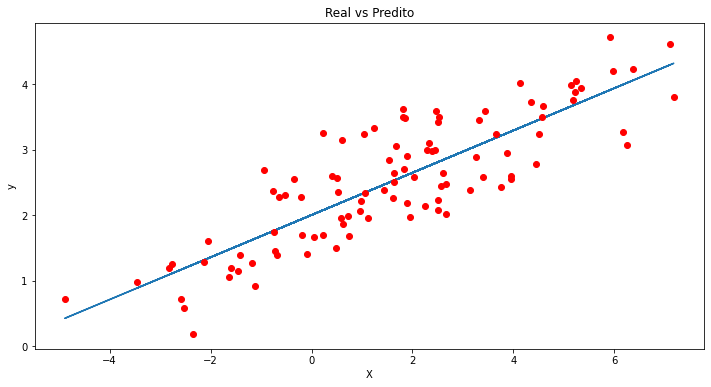

In [ ]:
# Plotando a regressão contra os dados reais
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # linha da regressão
plt.plot(X, y, 'ro')   # scatter plot mostrando os dados reais
plt.title('Real vs Predito')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

A linha azul é o melhor ajuste à equação $y_e = 2.003 + 0.323 X$. Podemos observar no gráfico que existe uma relação linear positiva entre $X$ e $y$. Usando nosso modelo, podemos predizer $y$ a partir de qualquer valor de $X$.

Ex: $y_e = 2.003 + 0.323 (10) = 5.233$.


### Regressão Linear usando scikit-learn

Agora que sabemos como implementar o regressor linear ''na mão'', vamos aprender a usar o scikit-learn para predizer um valor de saída utilizando variáveis de entrada com duas (ou mais) dimensões. Para isso, utilizaremos um famoso dataset chamado *advertising*, o qual é composto pelos custos incorridos em propagandas utilizando diversos meios e as vendas de um produto particular.

Neste exemplo, observaremos como as variáveis TV e Rádio podem predizer o número de vendas de um determinado produto. Vamos começar importando o dataset no formato csv como um Pandas dataframe usando a função read_csv(): 

In [ ]:
# Importa e mostra as cinco primeiras linhas do dataset advertising.

# pode ser baixado em: https://www.kaggle.com/purbar/advertising-data#Advertising.csv

advert = pd.read_csv('data/Advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Um regressor linear com mais de uma variável de predição é modelado da seguinte forma:

\begin{equation}
    y_e = \alpha + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p,
\end{equation}
onde $p$ é o número de variáveis de predição.

No nosso exemplo, iremos predizer o número de produtos vendidos (Sales) usando as variáveis TV e Rádio, i.e., nosso modelo pode ser escrito como:

\begin{equation}
    Vendas = \alpha + \beta_1TV + \beta_2Radio.
\end{equation}

Primeiramente, vamos inicializar nosso modelo de regressão linear, e então ajustar o modelo às nossas variáveis de predição e valor de saída:

In [ ]:
from sklearn.linear_model import LinearRegression

# Constroi o modelo de regressão linear usando as variáveis TV e Radio.
# Separa os dados em variáveis de predição de entrada X e a saída y
predictors = ['TV', 'Radio']
X = advert[predictors]
y = advert['Sales']

# Inicializa e ajusta o modelo
lm = LinearRegression()
model = lm.fit(X, y)

Dessa vez não é necessário calcular os valores de $\alpha$ e os $\beta$s, uma que nosso modelo retorna esses valores através das chamadas .intercept_ para o $\alpha$ e .coef_ para retornar o array com os valores de $\beta_1$ e $\beta_2$:

In [ ]:
alpha = model.intercept_
betas = model.coef_

print(f'alpha = {alpha}')
print(f'betas = {betas}')

alpha = 2.921099912405138
betas = [0.04575482 0.18799423]


Sendo assim, nosso modelo pode ser escrito como:

\begin{equation}
    Vendas = 2.921 + 0.046 * TV + 0.188 * Radio.
\end{equation}

In [ ]:
beta1 = betas[0]
beta2 = betas[1]
TV = advert['TV']
Radio = advert['Radio']

vendas = alpha + beta1 * TV + beta2 * Radio
print(f'vendas = {vendas.values}')

vendas = [20.55546463 12.34536229 12.33701773 17.61711596 13.22390813 12.51208449
 11.71821241 12.10551553  3.7093792  12.55169696  7.0358597  17.25652015
 10.60866187  8.81095051 18.44466773 20.82891539 12.90386507 23.24107626
  9.94121476 14.15384619 18.12139161 14.74206357  6.51417168 16.54402663
  8.14035215 15.6080206  14.96769383 17.0463346  19.39954145  9.15929748
 21.64292187 11.35791808  7.65045928 18.83346334  7.56302763 16.99280099
 23.36720719 15.6258994   9.91257829 20.4405801  16.37872122 17.29870935
 21.5621537  13.96692266  8.9009974  15.16263814  8.88644967 21.69944046
 16.28690268  8.18162949 12.64569407  9.31962792 20.66180115 19.96126242
 20.35512357 21.30864743  8.53774783 12.76239488 21.89072858 18.10746914
  5.74497097 22.90418658 16.78413768 13.18474853 16.96570907  7.82652846
  8.98703456 12.02066194 18.95313425 21.09369037 17.78350693 10.63329605
 10.35113844  9.91334008 17.30983543 11.90970399  4.48014809 13.79239059
  8.78920329  9.67621401 11.43621364 14.66

Porém, uma opção melhor é simplesmente usar a função .predict():

---



In [ ]:
vendas = model.predict(X)
print(f'vendas = {vendas}')

vendas = [20.55546463 12.34536229 12.33701773 17.61711596 13.22390813 12.51208449
 11.71821241 12.10551553  3.7093792  12.55169696  7.0358597  17.25652015
 10.60866187  8.81095051 18.44466773 20.82891539 12.90386507 23.24107626
  9.94121476 14.15384619 18.12139161 14.74206357  6.51417168 16.54402663
  8.14035215 15.6080206  14.96769383 17.0463346  19.39954145  9.15929748
 21.64292187 11.35791808  7.65045928 18.83346334  7.56302763 16.99280099
 23.36720719 15.6258994   9.91257829 20.4405801  16.37872122 17.29870935
 21.5621537  13.96692266  8.9009974  15.16263814  8.88644967 21.69944046
 16.28690268  8.18162949 12.64569407  9.31962792 20.66180115 19.96126242
 20.35512357 21.30864743  8.53774783 12.76239488 21.89072858 18.10746914
  5.74497097 22.90418658 16.78413768 13.18474853 16.96570907  7.82652846
  8.98703456 12.02066194 18.95313425 21.09369037 17.78350693 10.63329605
 10.35113844  9.91334008 17.30983543 11.90970399  4.48014809 13.79239059
  8.78920329  9.67621401 11.43621364 14.66

Agora que ajustamos um regressor linear com multiplas variaveis de entradas, podemos predizer a quantidade de vendas para qualquer combinação de valor gasto com propagando em TV e Rádio! Por exemplo, se quisermos saber quantas vendas fariamos ao investir $\$300$ em propaganda na TV e $\$200$ em propaganda em rádios, a única coisa a fazer é plugar esses novos valores:

In [ ]:
new_X = [[300, 300]]
print(model.predict(new_X))

[73.04581243]


/home/roder/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Isso significa que se gastarmos $\$300$ em propaganda na TV e $\$200$ em propaganda em rádios, poderiamos esperar, em média, vender 54 unidades de nosso produto.

Nessa aula, nós implementamos um modelo de regressão linear em python ''na mão'' e usando scikit-learn. Espero que tenham gostado.

# Exercícios

1. Ajustar o modelo ''Na mão'' utilizando o dataset *Advertising* para, dado o valor gasto com propaganda na TV, predizer a quantidade de produtos vendidos.

2. Ajustar o modelo utilizando scikit-learn para predizer a quantidade de produtos vendidos considerando os gastos em propaganda na TV, Rádio e Jornal (newspaper).

# Solução:

1. Ajustar o modelo ''Na mão'' utilizando o dataset *Advertising* para, dado o valor gasto com propaganda na TV, predizer a quantidade de produtos vendidos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SENAI_PR/exercicios/data/Advertising.csv')

X = df['TV'].values
y = df['Sales'].values

# Calculando as médias de X e y 
xmean = np.mean(X)
ymean = np.mean(y)

# Calcular os termos necessários para encontrar 𝛽,
# i.e., o numerador (covariancia entre X e y) e o denominador (variancia de X)
df['xycov'] = (df['TV'] - xmean) * (df['Sales'] - ymean)
df['xvar'] = (df['TV'] - xmean)**2

# Computando 𝛽 e 𝛼.
beta = df['xycov'].sum() / df['xvar'].sum()
alfa = ymean - (beta * xmean)
print(f'alfa = {alfa.round(3)}')
print(f'beta = {beta.round(3)}') 

alfa = 7.033
beta = 0.048


Agora que encontramos os valores de $\alpha$ e $\beta$, nosso modelo pode ser escrito da como $y_e = 7.033 + 0.048 * X$, e podemos fazer predições:




In [13]:
ypred = alfa + beta * X
print(ypred)


[17.97077451  9.14797405  7.85022376 14.23439457 15.62721814  7.44616232
  9.76595037 12.74649773  7.44140866 16.53041431 10.17476548 17.23871025
  8.16396559 11.66741599 16.73482186 16.32125309 10.25557777 20.40940417
 10.32212907 14.03474068 17.41459582 18.31779199  7.6600772  17.88520856
  9.99412625 19.52997632 13.82557947 18.44614092 18.85970969 10.38868036
 20.95607553 12.39948025 11.653155   19.65832525 11.58185004 20.85149492
 19.72012288 10.58358059  9.08142275 17.87094757 16.65876324 15.44657891
 20.98935118 16.86792445  8.22576322 15.35625929 11.2966302  18.43663359
 17.83291826 10.21279479 16.53041431 11.80527225 17.31952254 15.71278409
 19.52046899 16.48763133  7.37961102 13.50708398 17.05331735 17.04856369
  9.57580381 19.45391769 18.4081116  11.91460652 13.26464711 10.31262174
  8.52999772 13.65444756 18.31779199 17.3385372  16.49713866 12.25211667
  8.30657551 13.18383482 17.17691262  7.83596277  8.33985116 12.76075872
  7.28929141 12.54684384 10.66439288 18.43187992 10

## Vamos plotar a predição $ypred$ contra o valor real de $y$, providenciando uma compreensão visual de nosso modelo.

No handles with labels found to put in legend.


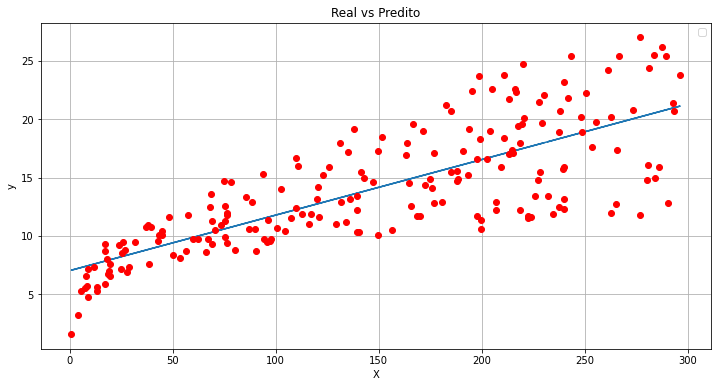

In [16]:
# Plotando a regressão contra os dados reais
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # linha da regressão
plt.plot(X, y, 'ro')   # scatter plot mostrando os dados reais
plt.title('Real vs Predito')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

A linha azul é o melhor ajuste à equação $y_e = 7.033 + 0.048  X$. Podemos observar no gráfico que existe uma relação linear positiva entre $X$ e $y$. Usando nosso modelo, podemos predizer $y$ a partir de qualquer valor de $X$.
Ex: $y_e = 7.033 + 0.048 (20) = 7.993 ≅ 8$







2. Ajustar o modelo utilizando scikit-learn para predizer a quantidade de produtos vendidos considerando os gastos em propaganda na TV, Rádio e Jornal (newspaper).

In [27]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SENAI_PR/exercicios/data/Advertising.csv')

from sklearn.linear_model import LinearRegression

# Constroi o modelo de regressão linear usando as variáveis TV, Radio e Newspaper.
# Separa os dados em variáveis de predição de entrada X e a saída y

predictors = ['TV', 'Radio', 'Newspaper']
X = df[predictors]
y = df['Sales']

# Inicializa e ajusta o modelo
lm = LinearRegression()
model = lm.fit(X, y)

-----------------------------
Um regressor linear com mais de uma variável de predição é modelado da seguinte forma:

\begin{equation}
    y_e = \alpha + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p,
\end{equation}
onde $p$ é o número de variáveis de predição.

No nosso exemplo, iremos predizer o número de produtos vendidos (Sales) usando as variáveis TV, Rádio e Newspaper, i.e., nosso modelo pode ser escrito como:

\begin{equation}
    Sales = \alpha + \beta_1TV + \beta_2Radio + \beta_3Newspaper.
\end{equation}

Primeiramente, vamos inicializar nosso modelo de regressão linear, e então ajustar o modelo às nossas variáveis de predição e valor de saída:


Dessa vez não é necessário calcular os valores de $\alpha$ e os $\beta$s, uma que nosso modelo retorna esses valores através das chamadas .intercept_ para o $\alpha$ e .coef_ para retornar o array com os valores de $\beta_1$, $\beta_2$ e $\beta_3$:

In [39]:
alpha = model.intercept_
betas = model.coef_

print(f'alpha = {alpha}')
print(f'betas = {betas}')

#Sendo assim, nosso modelo pode ser escrito como:
print('\nEntão temos que a equação fica:')
print(f'Sales = {alpha.round(3)} + ({betas[0].round(3)} * TV) + ({betas[1].round(3)} * Radio) + ({betas[2].round(3)} * Newspaper)')



alpha = 2.938889369459412
betas = [ 0.04576465  0.18853002 -0.00103749]

Então temos que a equação fica:
Sales = 2.939 + (0.046 * TV) + (0.189 * Radio) + (-0.001 * Newspaper)


In [42]:
TV = df['TV']
Radio = df['Radio']
Newspaper = df['Newspaper']

vendas = alpha + betas[0] * TV + betas[1] * Radio + betas[2] * Newspaper
print(f'Sales = {vendas.values}')

Sales = [20.52397441 12.33785482 12.30767078 17.59782951 13.18867186 12.47834763
 11.72975995 12.12295317  3.72734086 12.55084872  7.0322992  17.28512918
 10.57712073  8.82630048 18.43436638 20.81929952 12.82365674 23.22495716
  9.95168206 14.16607293 18.10076728 14.7405382   6.4891503  16.5459329
  8.14651887 15.6100386  14.98951429 17.05167344 19.41053803  9.14402389
 21.6339338  11.3460929   7.63888314 18.86426829  7.57483051 17.00682618
 23.40590052 15.62347779  9.90868103 20.44761039 16.37766467 17.2959832
 21.59580326 13.96385684  8.88787996 15.16152314  8.87338673 21.7226299
 16.26362018  8.1681656  12.63121132  9.33981296 20.66297563 19.94469957
 20.37443008 21.2926106   8.52771254 12.77458802 21.89805198 18.13348698
  5.74215558 22.89067208 16.78426073 13.21069202 16.97773556  7.84904532
  9.01603163 12.0370073  18.97657924 21.10891244 17.77949782 10.62693815
 10.36684881  9.90298206 17.32931197 11.85832174  4.47758904 13.81190223
  8.81331353  9.67530328 11.44592364 14.647940

In [45]:
#Porém, uma opção melhor é simplesmente usar a função .predict():

sale = model.predict(X)
print(f'sale = {sale}')

sale = [20.52397441 12.33785482 12.30767078 17.59782951 13.18867186 12.47834763
 11.72975995 12.12295317  3.72734086 12.55084872  7.0322992  17.28512918
 10.57712073  8.82630048 18.43436638 20.81929952 12.82365674 23.22495716
  9.95168206 14.16607293 18.10076728 14.7405382   6.4891503  16.5459329
  8.14651887 15.6100386  14.98951429 17.05167344 19.41053803  9.14402389
 21.6339338  11.3460929   7.63888314 18.86426829  7.57483051 17.00682618
 23.40590052 15.62347779  9.90868103 20.44761039 16.37766467 17.2959832
 21.59580326 13.96385684  8.88787996 15.16152314  8.87338673 21.7226299
 16.26362018  8.1681656  12.63121132  9.33981296 20.66297563 19.94469957
 20.37443008 21.2926106   8.52771254 12.77458802 21.89805198 18.13348698
  5.74215558 22.89067208 16.78426073 13.21069202 16.97773556  7.84904532
  9.01603163 12.0370073  18.97657924 21.10891244 17.77949782 10.62693815
 10.36684881  9.90298206 17.32931197 11.85832174  4.47758904 13.81190223
  8.81331353  9.67530328 11.44592364 14.6479409

In [44]:
df.keys()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Agora que ajustamos um regressor linear com multiplas variaveis de entradas, podemos predizer a quantidade de vendas para qualquer combinação de valor gasto com propagando em TV, Rádio e Newspapeer! Por exemplo, se quisermos saber quantas vendas fariamos ao investir $\$300$ em propaganda na TV, $\$200$ e $\$100$ em propaganda em rádios, a única coisa a fazer é plugar esses novos valores:

In [48]:
new_X = [[300, 200, 100]]
print(f' O valor seria: {model.predict(new_X).round(3)}')

 O valor seria: [54.271]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
